# Step 1: Load the Dataset

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [120]:
# Load the training dataset
train_data = pd.read_csv("C://Users//Alpana//Desktop//internship//task 2//train.csv")



In [121]:
# Display the first few rows of the dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Data Cleaning
Data cleaning involves handling missing values, converting data types, and addressing any inconsistencies in the dataset.



In [122]:
# Check for missing values
train_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'].fillna('Unknown', inplace=True)



In [124]:
# Drop unnecessary columns
train_data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)



In [125]:
# Verify that missing values have been handled
print(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)
Summary Statistics

In [126]:
# Summary statistics
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Visualizations**
To understand the relationships between variables, we'll create some visualizations using matplotlib and seaborn.



In [127]:
# Set up the visualizations
sns.set(style="whitegrid")


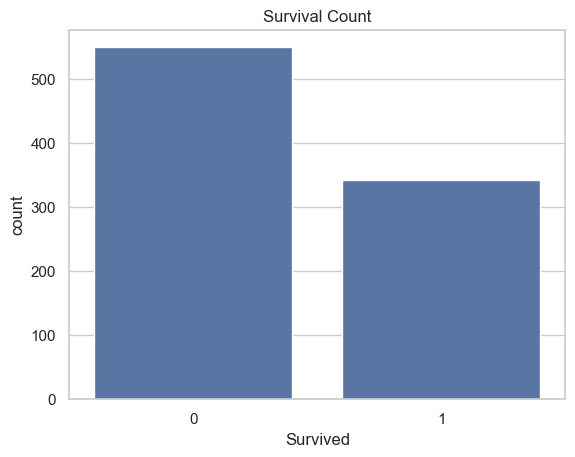

In [128]:
# Survival rate
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()


Interpretation:

- Overall Survival Count: This count plot shows the total number of survivors versus non-survivors.
- Counts:
- Non-Survivors (0): Higher count of passengers who did not survive.
- Survivors (1): Lower count of passengers who survived.

Trend: The overall survival rate is lower, indicating that more passengers perished than survived in the Titanic disaster.

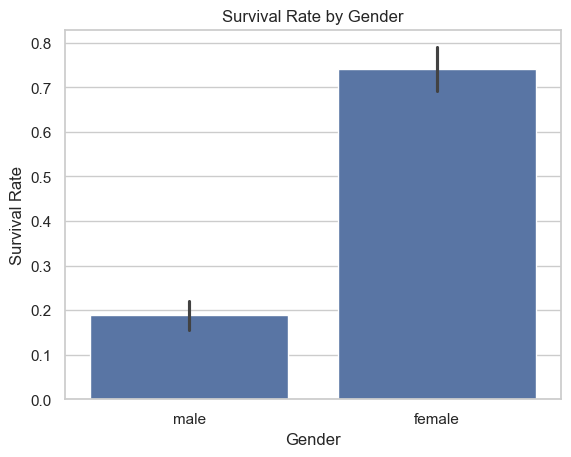

In [129]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


Interpretation:

- Gender and Survival: Females have a significantly higher survival rate compared to males.
- Survival Rate: The survival rate for females is above 70%, whereas for males, it's below 20%.

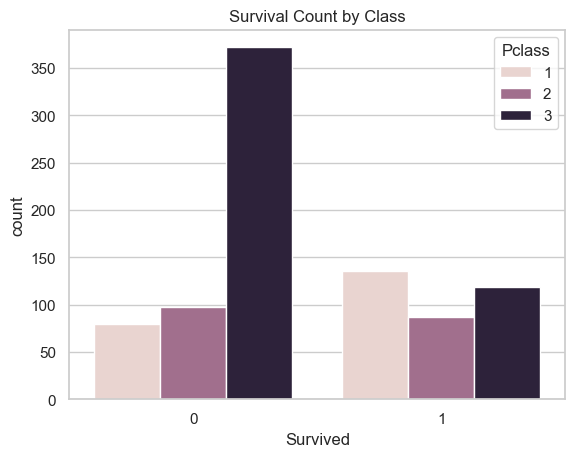

In [130]:
# Survival rate by class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Class')
plt.show()


Interpretation:

- Class Distribution: The count plot shows the distribution of survival counts across different passenger classes (Pclass).
Survivors:
- 1st Class: Higher number of survivors compared to non-survivors.
- 2nd Class: Moderate number of survivors, slightly fewer non-survivors.
- 3rd Class: High number of non-survivors, significantly fewer survivors.

Trend: Higher class passengers (1st and 2nd) had better survival rates, while 3rd class passengers had lower survival rates.

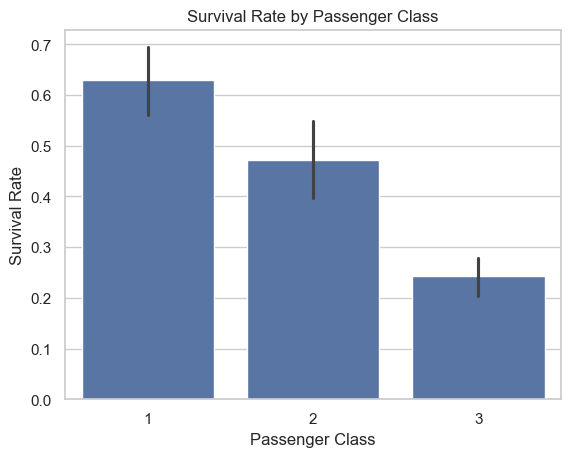

In [131]:
#3. Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Interpretation:

- Class and Survival: Higher-class passengers (1st class) had a better chance of survival compared to lower-class passengers.
- Trend: The survival rate decreases as the passenger class decreases, with 1st class having the highest rate, followed by 2nd class, and then 3rd class.

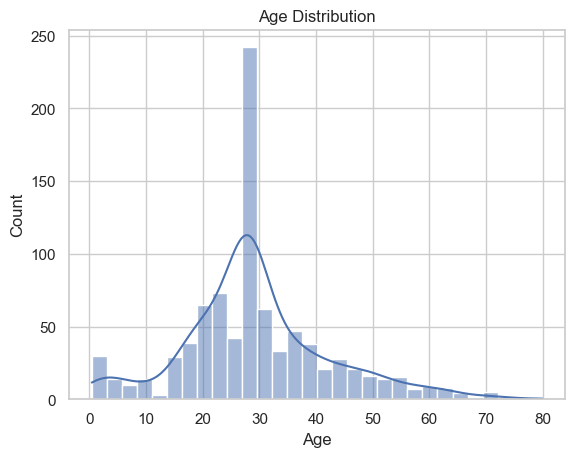

In [132]:
# Age distribution
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

Interpretation:

- Shape: The age distribution is slightly right-skewed, indicating a higher frequency of younger passengers.
- Peaks: There are noticeable peaks around ages 20-30, suggesting many young adults were aboard.
- KDE Line: The Kernel Density Estimate (KDE) line smooths out the histogram, showing a concentration of passengers in their 20s and 30s.

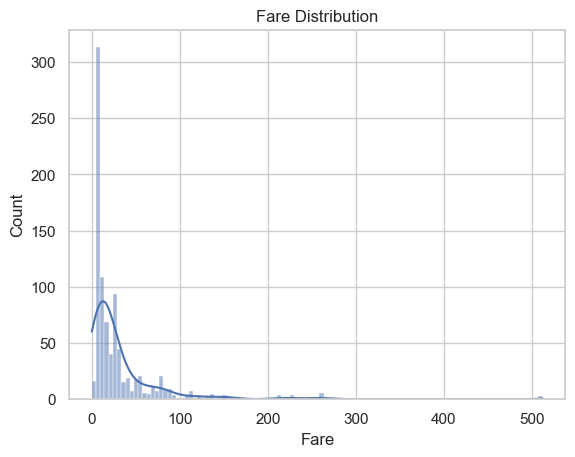

In [133]:
# Fare distribution
sns.histplot(train_data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


Interpretation:

- Shape: The fare distribution is heavily right-skewed, indicating most passengers paid lower fares, with fewer passengers paying very high fares.
- Peaks: There is a peak at the lower fare values.
- KDE Line: The Kernel Density Estimate (KDE) line smooths out the histogram and indicates a high concentration of lower fares.
- Outliers: The long tail of the distribution shows the presence of some high fare outliers, indicating a few passengers paid significantly more than the average.

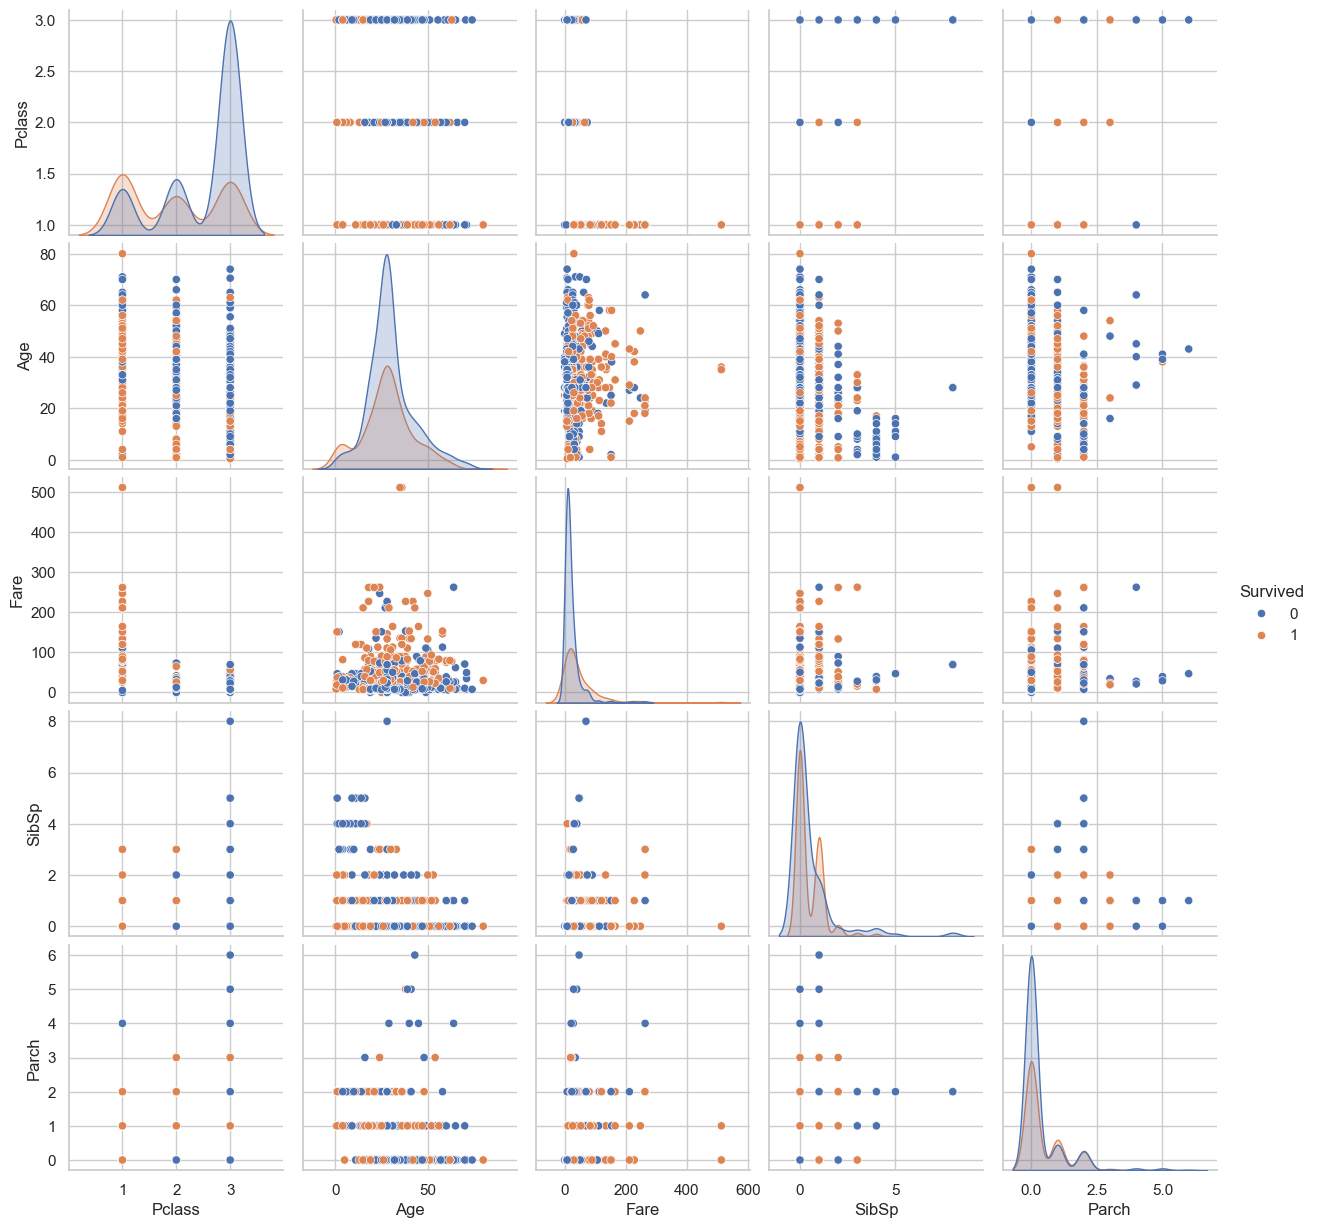

In [134]:
# Pairplot to see relationships between features
sns.pairplot(train_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()


Interpretation:

- Overview: The pairplot allows us to visualize relationships between multiple features and their impact on survival.
- Diagonal Plots: The diagonal plots show the distribution of individual features for both survivors and non-survivors.
- Survived vs. Pclass: Clear separation between the classes, with higher classes (lower class number) showing a higher proportion of survivors.
- Survived vs. Age: Younger passengers show a higher survival rate.
- Survived vs. Fare: Higher fares are associated with a higher survival rate.
- Sex Feature: Distinct clusters for male and female passengers, showing females have a higher survival rate.
- Other Features: SibSp and Parch show some patterns, but the relationships are not as strong or clear as those for Pclass, Age, and Fare.

# Step 4: Identifying Patterns and Trends


In [135]:
# Convert categorical variables to numeric for correlation matrix
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})



In [136]:
# Correlation matrix
numeric_cols = train_data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

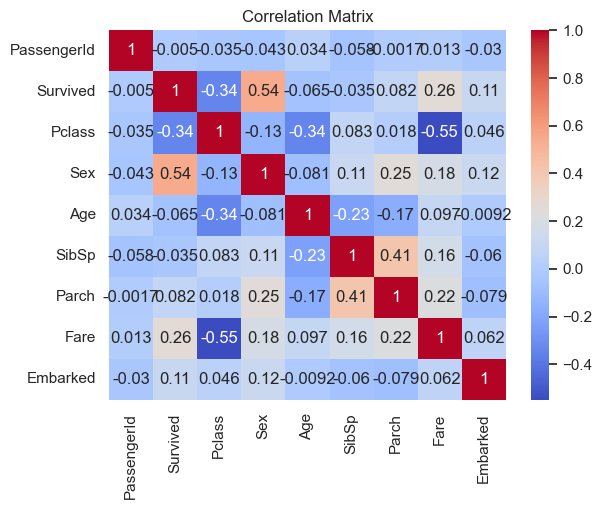

In [137]:
# Plotting the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Interpretation:

- Survived:
        Positive correlations with Fare (0.26) and Pclass (-0.34): Passengers who paid higher fares and were in higher classes were more likely to survive.
- Pclass:
        Negative correlation with Fare (-0.55): Higher class passengers paid higher fares.
- Age and SibSp/Parch:
        No strong correlations with Survived, indicating age and number of relatives aboard are less predictive of survival compared to gender and class.
- Overall: The heatmap indicates that the most relevant features for predicting survival are likely to be Sex, Pclass, and Fare.